ASIAN PAINT, AXIS BANK, BRITANNIA, CIPLA, DR REDDY, GAIL, GRASIM, HDFC, ICICI BANK, INDUSIND BK

Enter ticker: indusindbk
Prediction period (NEXT DAY / MONTHLY / YEARLY): next day
Raw rows: 938
After preprocessing rows: 919
Sequences: (889, 30, 10) (889, 1) (889, 1)
Train/Val/Test sizes: 622 133 134
Models built.
Training CNN-LSTM (price regression)
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0196 - val_loss: 0.0328
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019 - val_loss: 0.0162
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - val_loss: 0.0163
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 0.0148
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015 - val_loss: 0.0156
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010 - val_loss: 0.0157
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - val_loss: 0.0113
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014 - val_loss: 0.0171
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.6353e-04 - val_loss: 0.0231
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.1502e-04 - val_loss: 0.0133
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.1803e-04 - val_loss: 0.0121
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.

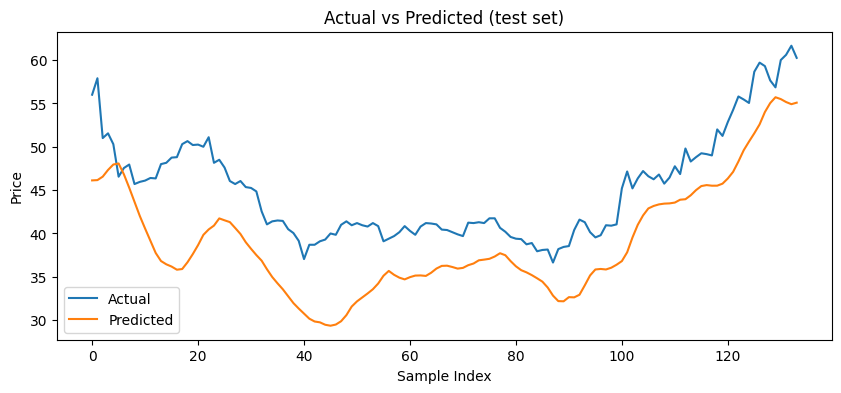


Standalone LSTM evaluation:
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

RMSE: 2.4001 | MAE: 1.8371 | R2: 0.8441


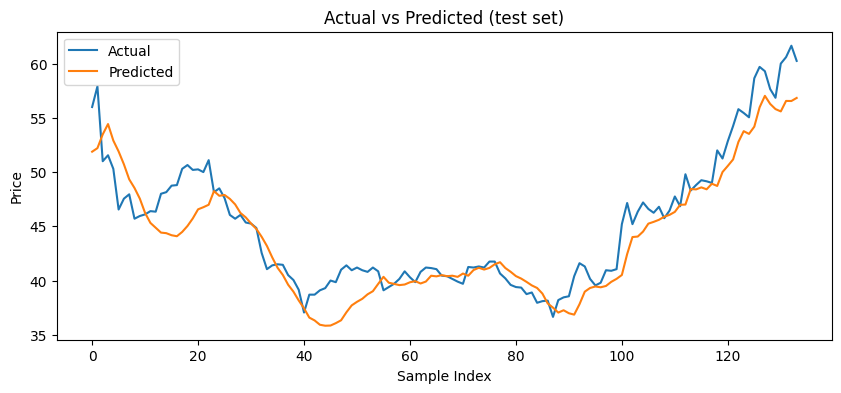


Standalone CNN evaluation:
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

RMSE: 10.0864 | MAE: 9.6696 | R2: -1.7531


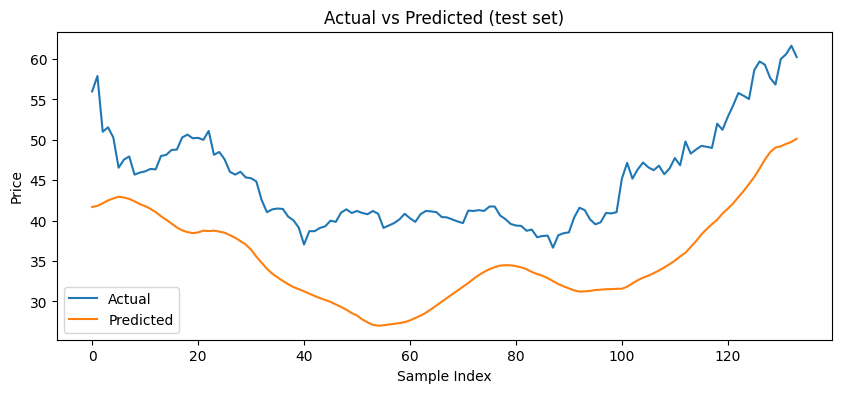

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.6924 - val_loss: 0.7021
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6932 - val_loss: 0.7083
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6920 - val_loss: 0.7108
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6918 - val_loss: 0.7125
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6917 - val_loss: 0.7141
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6916 - val_loss: 0.7154

Trend classification evaluation:
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 0.5000 | F1 Score: 0.0000


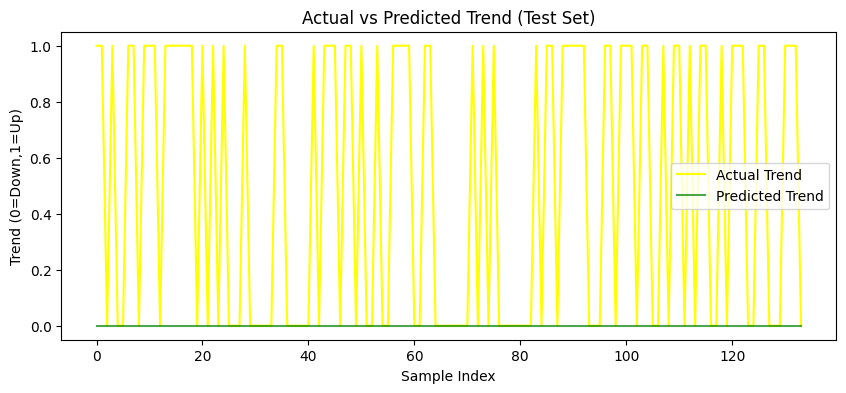

Done. Memory freed.


In [52]:
#Importing dependencies
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling1D #For flattening the 3D to 1D

#Provinding optimized parameters for resource management
N_STEPS = 30           #lookback days
BATCH_SIZE = 16
EPOCHS = 20            #small by default; early stopping will stop earlier
LSTM_UNITS = 32        #small to save memory
CONV_FILTERS = [32, 16]
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

#Mapping between ticker display names and filenames
ticker_to_file = {
    "ASIAN PAINT": "ASIANPAINT.csv",
    "AXIS BANK": "AXISBANK.csv",
    "BRITANNIA": "BRITANNIA.csv",
    "CIPLA": "CIPLA.csv",
    "DR REDDY": "DRREDDY.csv",
    "GAIL": "GAIL.csv",
    "GRASIM": "GRASIM.csv",
    "HDFC": "HDFC.csv",
    "ICICI BANK": "ICICIBANK.csv",
    "INDUSIND BK": "INDUSINDBK.csv"
}

#Normalize dictionary keys for flexible matching
normalized_ticker_map = {k.replace(" ", "").upper(): v for k, v in ticker_to_file.items()}

#Data Preprocessing and Feature Engineering
def preprocess_stock_data(df):
#Ensuring expected columns present
    required = {'Date','Open','High','Low','Close','Volume'}
    if not required.issubset(df.columns):
        raise ValueError(f"Missing required cols: {required - set(df.columns)}")

#Sorting the cols as per date if not sorted
    df = df.sort_values('Date').reset_index(drop=True)

#Computing 20-day simple moving average to consider smoothened short-term fluctuations: TREND INDICATOR
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

#Computing Bolinger Bands (20-day SMA +/- 2* standard deviation) is the bandwidth in which fluctuations are occuring: VOLATILITY INDICATORS
    df['BB_upper'] = df['SMA_20'] + 2*df['Close'].rolling(window=20).std()
    df['BB_lower'] = df['SMA_20'] - 2*df['Close'].rolling(window=20).std()

#Computing Relative Strength Index (RSI) for a 14-day window to capture recent strong price changes: MOMENTUM INDICATORS
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rsi = gain/loss
    df['RSI_14'] = 100 - (100/(1+rsi))
    df['RSI_14'] = df['RSI_14'].fillna(50)  #neutral where not computable

#Computing Moving average convergence/divergence (MACD) for a 12 to 26-days estimated moving average to capture the trend: TREND INDICATOR
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26

#Dropping rows that resulted in NaN after calculations
    df = df.dropna().reset_index(drop=True)

#Feature selection (choosing reasonable subset to limit memory)
    feature_cols = ['Open','High','Low','Close','Volume','SMA_20','BB_upper','BB_lower','RSI_14','MACD']
#Scaling features
    scaler = MinMaxScaler()
    df[feature_cols] = scaler.fit_transform(df[feature_cols])

#Returning processed df and scaler (scaler useful to invert predictions)
    return df, scaler, feature_cols

#Creating supervised sequences for next-day prediction
#X: sequences of shape (samples, N_STEPS, n_features)
#y_price: next-day Close (regression)
#y_trend: next-day up/down (binary)
def create_sequences(df, feature_cols, n_steps=30):
    data = df[feature_cols].values.astype(np.float32)
    close_col_idx = feature_cols.index('Close')
    X, y_price, y_trend = [], [], []

    for i in range(len(data) - n_steps): #window size
      x = data[i : i + n_steps]
      target_close = data[i + n_steps, close_col_idx]  #scaling close next day
      current_close = data[i + n_steps - 1, close_col_idx]  #last close in input window
      X.append(x) #X dataset
      y_price.append(target_close)  #regression on scaled close
      #For trend: 1 (Up) if next day close > last close (both scaled)
      y_trend.append(1 if target_close > current_close else 0) #(0 if neutral or down)

    X = np.array(X, dtype=np.float32)
    y_price = np.array(y_price, dtype=np.float32).reshape(-1,1)
    y_trend = np.array(y_trend, dtype=np.int32).reshape(-1,1)
    return X, y_price, y_trend

#Splitting the dataset into 70% training, 15% validation, 15% test sets
def time_split_sequences(X, y, train_frac=0.7, val_frac=0.15):
  n = len(X)
  train_end = int(n * train_frac)
  val_end = int(n * (train_frac + val_frac))
  X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
  y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]
  return X_train, X_val, X_test, y_train, y_val, y_test

#Models: Hybridized and Standalone
def build_cnn_lstm(input_shape, lstm_units=LSTM_UNITS):
  model = Sequential([
      Conv1D(CONV_FILTERS[0], kernel_size=3, activation='relu', input_shape=input_shape),
      Conv1D(CONV_FILTERS[1], kernel_size=3, activation='relu'),
      Dropout(0.2),
      LSTM(lstm_units),
      Dense(1, activation='linear')
    ])
  return model

def build_lstm(input_shape, lstm_units=LSTM_UNITS):
  model = Sequential([
      LSTM(lstm_units, input_shape=input_shape),
      Dense(1, activation='linear')
    ])
  return model

def build_cnn(input_shape):
  model = Sequential([
      Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
      GlobalAveragePooling1D(),  #Averaging across timesteps
      Dense(1)
  ])
  return model

#Training the models with memory management
def train_regression_model(model, X_train, y_train, X_val, y_val, batch_size=BATCH_SIZE, epochs=EPOCHS):
  model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')
  es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs,batch_size=batch_size, callbacks=[es], verbose=1)
  return model, history

#Classification evaluation for trend (binary): PRICE PREDICTION
def evaluate_regression(model, X_test, y_test, scaler=None, feature_cols=None):
  preds = model.predict(X_test, batch_size=BATCH_SIZE).reshape(-1)
  y_test_flat = y_test.reshape(-1)

  if len(preds) != len(y_test_flat):
    raise ValueError(f"Shape mismatch: preds={len(preds)}, y_test={len(y_test_flat)}")

  if scaler is not None and feature_cols is not None and 'Close' in feature_cols:
    idx = feature_cols.index('Close')
    dummy = np.zeros((len(y_test_flat), len(feature_cols)))
    dummy[:, idx] = preds
    inv_pred = scaler.inverse_transform(dummy)[:, idx]
    dummy[:, idx] = y_test_flat
    inv_true = scaler.inverse_transform(dummy)[:, idx]
  else:
    inv_pred = preds
    inv_true = y_test_flat

  rmse = np.sqrt(mean_squared_error(inv_true, inv_pred))
  mae = mean_absolute_error(inv_true, inv_pred)
  r2 = r2_score(inv_true, inv_pred)

  print(f"\nRMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")

  plt.figure(figsize=(10,4))
  plt.plot(inv_true, label='Actual')
  plt.plot(inv_pred, label='Predicted')
  plt.legend()
  plt.xlabel('Sample Index')
  plt.ylabel('Price')
  plt.title("Actual vs Predicted (test set)")
  plt.show()

  return rmse, mae, r2

#TREND PREDICTION
def evaluate_trend(model, X_test, y_test):
  preds = model.predict(X_test, batch_size=BATCH_SIZE)
  preds_class = (preds > 0.5).astype(int).reshape(-1)
  y_true = y_test.reshape(-1)

  acc = accuracy_score(y_true, preds_class)
  f1 = f1_score(y_true, preds_class)
  print(f"Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

  plt.figure(figsize=(10,4))
  plt.plot(y_true, label='Actual Trend', color='yellow')
  plt.plot(preds_class, label='Predicted Trend', color= 'green', alpha=0.7)
  plt.xlabel('Sample Index')
  plt.ylabel('Trend (0=Down,1=Up)')
  plt.title("Actual vs Predicted Trend (Test Set)")
  plt.legend()
  plt.show()

#Cleaning memory
def free_memory(*objs):
  for o in objs:
    try:
      del o #Delete all objects
    except:
      pass
  K.clear_session() #Clearing session
  gc.collect()  #Garbage collection

#'Main' function
def main():
#Displaying the ticker options clearly print("Available tickers:")
  print("ASIAN PAINT, AXIS BANK, BRITANNIA, CIPLA, DR REDDY, GAIL, GRASIM, HDFC, ICICI BANK, INDUSIND BK")
#Getting ticker
  user_input = input("\nEnter ticker: ").strip().upper().replace(" ", "")
  if user_input not in normalized_ticker_map:
    print("Ticker not recognized. Available:", list(normalized_ticker_map.keys()))
    return
  file_name = normalized_ticker_map[user_input]
  if not os.path.exists(file_name):
    print(f"CSV file '{file_name}' not found in current directory.")
    return

#Getting prediction period
  pred_type = input("Prediction period (NEXT DAY / MONTHLY / YEARLY): ").strip().upper()
  if pred_type not in ['NEXT DAY','MONTHLY','YEARLY']:
    print("Invalid prediction type.")
    return

  if pred_type == 'NEXT DAY':
    #Reading and preprocessing
    df = pd.read_csv(file_name, parse_dates=['Date'])
    print("Raw rows:", len(df))
    df_proc, scaler, feature_cols = preprocess_stock_data(df)
    print("After preprocessing rows:", len(df_proc))

    #Creating sequences (next-day)
    X, y_price, y_trend = create_sequences(df_proc, feature_cols, n_steps=N_STEPS)
    print("Sequences:", X.shape, y_price.shape, y_trend.shape)

    #Time-split sequences
    X_train, X_val, X_test, y_price_train, y_price_val, y_price_test = time_split_sequences(X, y_price)

    #Splitting y_trend using same indices as y_price
    y_trend_train = y_trend[:len(y_price_train)]
    y_trend_val   = y_trend[len(y_price_train):len(y_price_train)+len(y_price_val)]
    y_trend_test  = y_trend[len(y_price_train)+len(y_price_val):]

    print("Train/Val/Test sizes:", len(X_train), len(X_val), len(X_test))

    #Building models (regression on price)
    input_shape = (X_train.shape[1], X_train.shape[2])
    cnn_lstm = build_cnn_lstm(input_shape, lstm_units=LSTM_UNITS)
    lstm_model = build_lstm(input_shape, lstm_units=LSTM_UNITS)
    cnn_model = build_cnn(input_shape)
    print("Models built.")

    #Training models (regression)
    print("Training CNN-LSTM (price regression)")
    cnn_lstm, _ = train_regression_model(cnn_lstm, X_train, y_price_train, X_val, y_price_val)
    print("Training standalone LSTM (price regression)")
    lstm_model, _ = train_regression_model(lstm_model, X_train, y_price_train, X_val, y_price_val)
    print("Training standalone CNN (price regression)")
    cnn_model, _ = train_regression_model(cnn_model, X_train, y_price_train, X_val, y_price_val)

    #Evaluating the models
    print("\nCNN-LSTM evaluation:")
    evaluate_regression(cnn_lstm, X_test, y_price_test, scaler=scaler, feature_cols=feature_cols)
    print("\nStandalone LSTM evaluation:")
    evaluate_regression(lstm_model, X_test, y_price_test, scaler=scaler, feature_cols=feature_cols)
    print("\nStandalone CNN evaluation:")
    evaluate_regression(cnn_model, X_test, y_price_test, scaler=scaler, feature_cols=feature_cols)

    #Training a small classifier for trend
    free_memory(cnn_lstm, lstm_model)  #freeing models to reduce memory before building classifier

    #Building tiny classifier
    clf_model = Sequential([LSTM(32, input_shape=input_shape), Dense(1, activation='sigmoid')])
    clf_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    clf_model.fit(X_train, y_trend_train, validation_data=(X_val, y_trend_val),epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es], verbose=1)

    print("\nTrend classification evaluation:")
    evaluate_trend(clf_model, X_test, y_trend_test)

    #Cleanup
    free_memory(clf_model, X, y_price, y_trend, X_train, X_val, X_test, y_price_train, y_price_val, y_price_test, y_trend_train, y_trend_val, y_trend_test, df, df_proc)
    print("Done. Memory freed.")

if __name__ == "__main__":
  main()